In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
play_store_df = pd.read_csv("play store Data.csv")
user_reviews_df = pd.read_csv("user reviews.csv")


In [21]:
play_store_df['Reviews'] = pd.to_numeric(play_store_df['Reviews'], errors='coerce')
play_store_df.dropna(subset=['Reviews'], inplace=True)
filtered_apps = play_store_df[play_store_df["Reviews"] > 1000]
top_categories = filtered_apps["Category"].value_counts().head(5).index
filtered_apps = filtered_apps[filtered_apps["Category"].isin(top_categories)]
merged_df = user_reviews_df.merge(filtered_apps, on="App")

In [22]:
def categorize_rating(rating):
    if rating <= 2:
        return "1-2 Stars"
    elif rating <= 4:
        return "3-4 Stars"
    else:
        return "4-5 Stars"
merged_df["Sentiment_Polarity"] = pd.to_numeric(merged_df["Sentiment_Polarity"], errors='coerce')


In [23]:
merged_df.dropna(subset=['Sentiment_Polarity'], inplace=True)

In [24]:
merged_df["Rating Group"] = merged_df["Sentiment_Polarity"].apply(categorize_rating)


In [25]:
sentiment_counts = merged_df.groupby(["Category", "Rating Group", "Sentiment"]).size().unstack(fill_value=0)

<Figure size 1200x600 with 0 Axes>

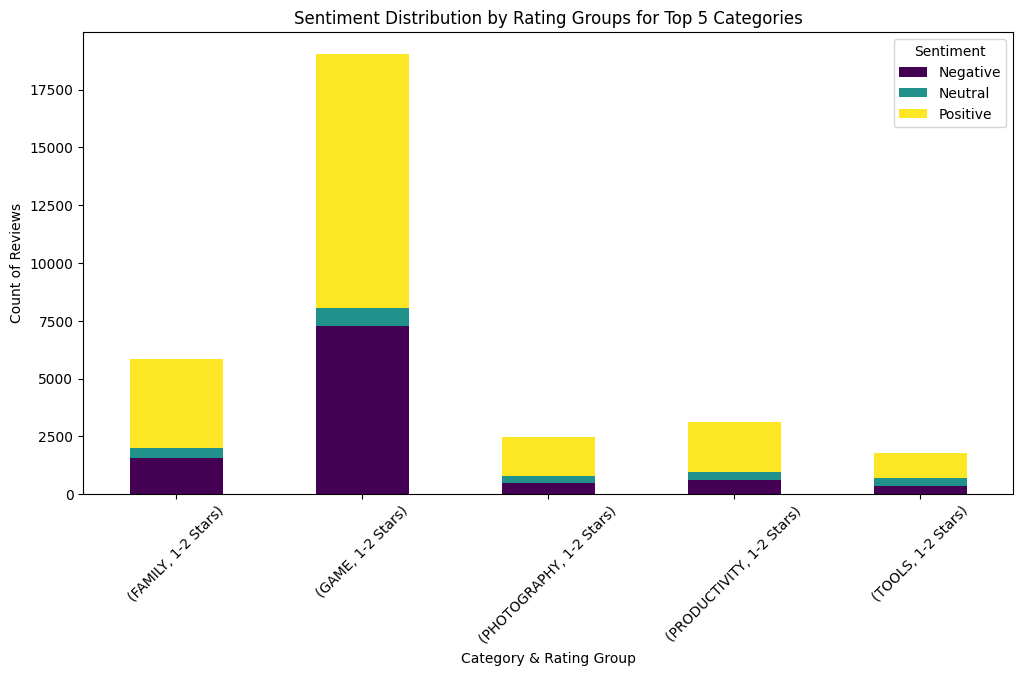

In [26]:
plt.figure(figsize=(12, 6))
sentiment_counts.plot(kind="bar", stacked=True, colormap="viridis", figsize=(12, 6))
plt.title("Sentiment Distribution by Rating Groups for Top 5 Categories")
plt.xlabel("Category & Rating Group")
plt.ylabel("Count of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()